<a href="https://colab.research.google.com/github/aryachandrak/PCVK-2024-Ganjil/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

In [1]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


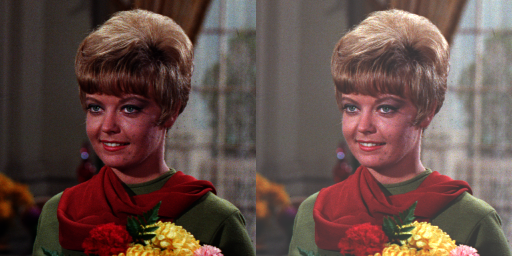

In [4]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Copy of female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Task

#### 1. Implement image inverse in your code using formula shown in the theoretical background subsection above, giving the output shown in the following figure:


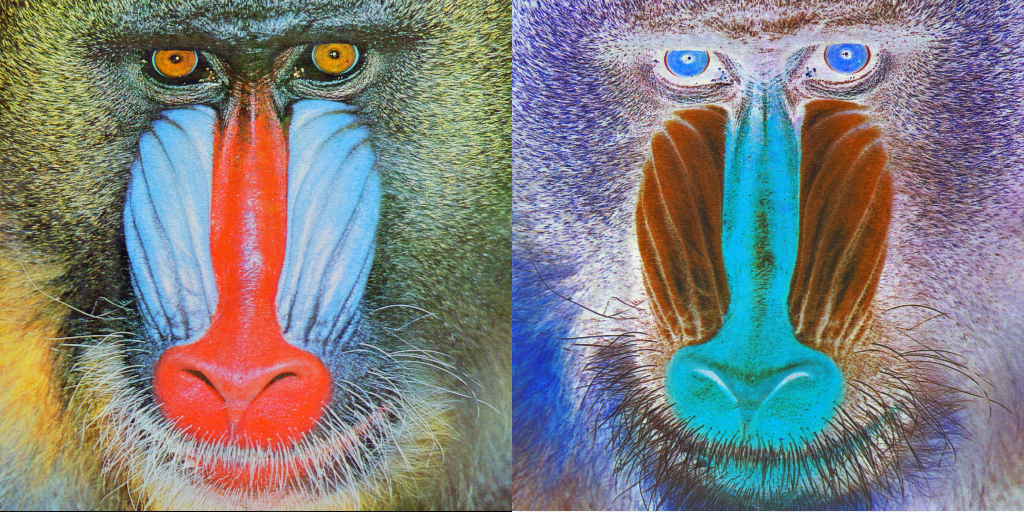

In [5]:
original_monkey = cv.imread('/content/drive/MyDrive/Copy of mandrill.tiff')
negative_image = np.zeros(original_monkey.shape, original_monkey.dtype)

for y in range(negative_image.shape[0]):
  for x in range(negative_image.shape[1]):
    for c in range(negative_image.shape[2]):
      negative_image[y, x, c] = 255 - original_monkey[y, x, c]

original_monkey_frame = cv.hconcat((original_monkey, negative_image))
cv2_imshow(original_monkey_frame)

#### 2. Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section, giving the output shown in the following figure:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255,-255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


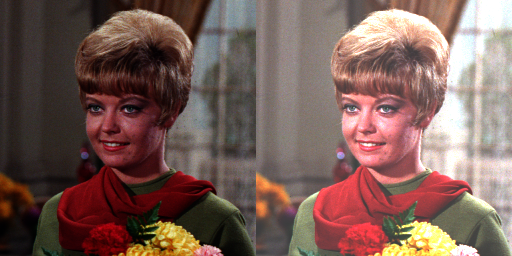

In [6]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')

try:
  brightness2 = float(input('Masukkan tingkat kecerahan [-255,-255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print("Error, value not number")

contrast_image = np.zeros(original.shape, original.dtype)

for y in range(contrast_image.shape[0]):
  for x in range(contrast_image.shape[1]):
    for c in range(contrast_image.shape[2]):
      # formula -> g(x, y) = a * f(x,y) + b
      contrast_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness2, 0, 255)

contrast_frame = cv.hconcat((original, contrast_image))
cv2_imshow(contrast_frame)

#### 3. Implement transformation of logarithmic brightness on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output shown in the following figure:

Mengubah tingkat kecerahan citra dengan Transformasi Log
-------------------------------------------------------
Masukkan tingkat kecerahan: 40


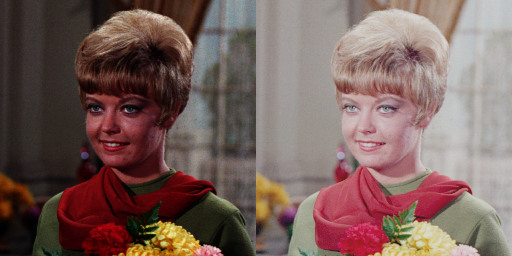

In [7]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('-------------------------------------------------------')

try:
  brightness3 = float(input('Masukkan tingkat kecerahan: '))
except ValueError:
  print('Error, value not number')

# konversi tipe float32 untuk akurasi komputasi logaritma
original_log = original.astype(np.float32)

# transformasi logaritmik
# formula -> s = c * log(1 + r)
logaritmic_image = brightness3 * np.log(1 + original_log)

# normalisasi hasil ke rentang [0, 255]
logaritmic_image = np.clip(logaritmic_image, 0, 255)
logaritmic_image = logaritmic_image.astype(np.uint8)

log_image_frame = cv.hconcat((original, logaritmic_image))
cv2_imshow(log_image_frame)

#### 4. Implement grayscale transformation using the averaging, lightness, and luminance method on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output as follows :

averaging

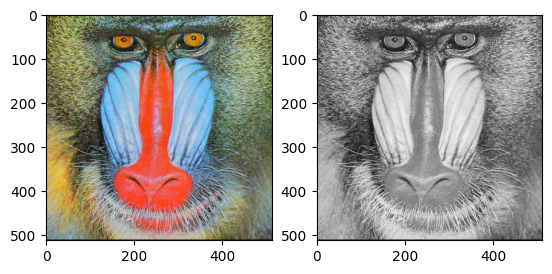

In [8]:
original_monkey_rgb = original_monkey.copy()
original_monkey_rgb = cv.cvtColor(original_monkey, cv.COLOR_BGR2RGB)

grayscale_averaging = np.zeros((original_monkey.shape[0], original_monkey.shape[1]), dtype=np.uint8)
for y in range(original_monkey.shape[0]):
  for x in range(original_monkey.shape[1]):
    grayscale_averaging[y, x] = int(np.mean(original_monkey[y,x]))

# Create a figure and a set of subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2)

# Display the original image on the first subplot
axes[0].imshow(original_monkey_rgb)

# Display the grayscale image on the second subplot
axes[1].imshow(grayscale_averaging, cmap='gray')

Lightness

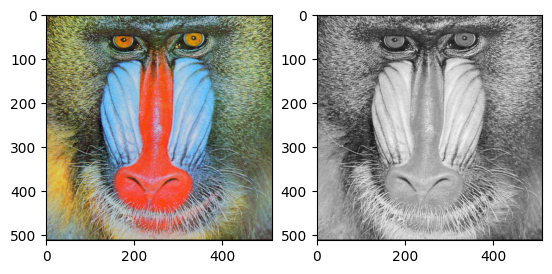

In [9]:
grayscale_lightness = np.zeros((original_monkey.shape[0], original_monkey.shape[1]), dtype=np.uint8)
for y in range(original_monkey.shape[0]):
  for x in range(original_monkey.shape[1]):
        max_val = int(np.max(original_monkey[y, x]))
        min_val = int(np.min(original_monkey[y, x]))
        grayscale_lightness[y, x] = (max_val + min_val) // 2

fig, axes = plt.subplots(1, 2)

axes[0].imshow(original_monkey_rgb)
axes[1].imshow(grayscale_lightness, cmap='gray')

Luminance

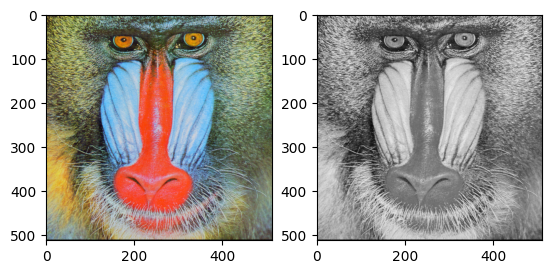

In [10]:
grayscale_luminance = np.zeros((original_monkey.shape[0], original_monkey.shape[1]), dtype=np.uint8)
for y in range(original_monkey.shape[0]):
  for x in range(original_monkey.shape[1]):
      r, g, b = original_monkey[y, x][2], original_monkey[y, x][1], original_monkey[y, x][0]
      grayscale_luminance[y, x] = int(0.21 * r + 0.72 * g + 0.07 * b)

fig, axes = plt.subplots(1,2)

axes[0].imshow(original_monkey_rgb)
axes[1].imshow(grayscale_luminance, cmap='gray')

#### 5. Show certain colors in the image , and change other colors to grayscale. For example , show the blue color in the image input and change the parts other which is not colored blue into grayscale as in the example below :

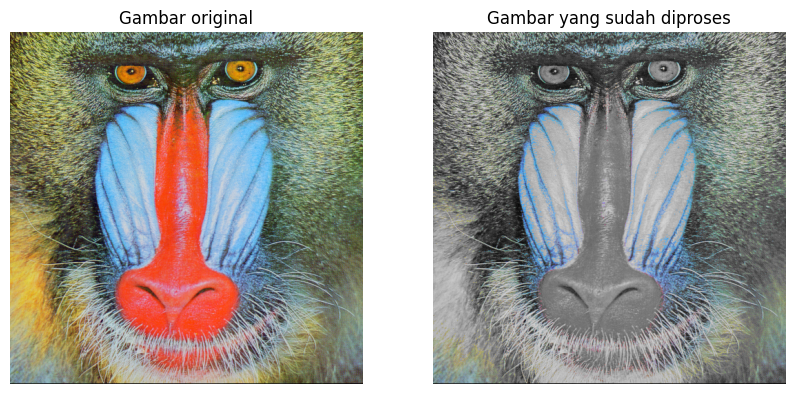

In [11]:
monkey_img = original_monkey.copy()
monkey_img = cv.cvtColor(original_monkey, cv.COLOR_BGR2RGB)

lower_blue = np.array([0, 0, 100])
upper_blue = np.array([180, 180, 255])

mask = cv.inRange(monkey_img, lower_blue, upper_blue)

gray_image = cv.cvtColor(monkey_img, cv.COLOR_RGB2GRAY)
gray_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2RGB)

result = np.where(mask[:, :, None].astype(bool), monkey_img, gray_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Gambar original')
plt.imshow(monkey_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gambar yang sudah diproses')
plt.imshow(result)
plt.axis('off')

plt.show()